In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

In [2]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [ ]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [ ]:
anim

## Fern as gif

In [6]:
from plotly.grid_objs import Grid, Column

import time

In [7]:
 # -*- coding: utf-8 -*-
from __future__ import print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc



In [8]:
class BarnsleyFern:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.param = np.array([[0.    , 	0.       , 	0.       , 	0.16, 	0., 	0.   , 	0.01],
                              [0.85 , 	0.04    , 	-0.04   , 	0.85, 	0, 	1.60, 	0.85],
                              [0.20 , 	-0.26   ,	0.23    , 	0.22, 	0,	1.60, 	0.07],
                              [-0.15,	0.28    , 	0.26    , 	0.24, 	0, 	0.44, 	0.07]]) #a,b,c,d,e,f,p
        self.color= [50,255,50]#[random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        self.proba = np.cumsum(self.param[:,6])

    def fx(self, ):
        r = np.random.uniform()
        if r < self.proba[0]:
            i=0
        elif self.proba[0] <= r < self.proba[1]:
            i=1
        elif self.proba[1] <= r < self.proba[2]:
            i=2
        else:
            i=3
        x= self.param[i,0]*self.x + self.param[i,1]*self.y + self.param[i,4]
        self.y = self.param[i,2]*self.x + self.param[i,3]*self.y + self.param[i,5]
        self.x=x


/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



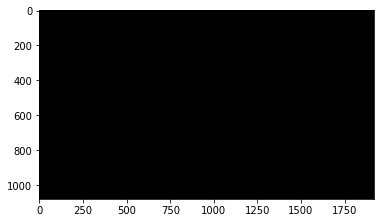

AttributeError: type object 'Apply' has no attribute 'animate'

In [13]:
class Apply:
    def __init__(self):
        self.nbi=0
        self.height=1080
        self.width=1920
        self.nb_itermax = 100000
        self.x0 =0.
        self.y0 =0.
        imgmat = np.zeros((self.width,self.height,3), dtype=np.uint8)
        self.BF = BarnsleyFern(self.x0,self.y0)
        #self.BF.iter(self.nb_itermax,imgmat,self.width,self.height)

    # img = Image.fromarray(imgmat, 'RGB')
        self.F = plt.figure()
        self.Ax = plt.imshow( np.swapaxes(imgmat, 1, 0))
        self.F.show()
        plt.pause(0.1)
        self.a=0
        return

    def iter(self,n):
        x = np.zeros(n)
        y = np.zeros(n)
        for i in np.arange(n):
            self.BF.fx()
            x[i],y[i]=self.BF.x,self.BF.y
        return x,y

    def scale(self,x, y ,width,height):
        x-=x.min()
        y-=y.min()
        rx =(width-1)/ (x.max() - x.min())
        ry =(height-1)/ (y.max() - y.min())
        r=min(rx,ry)
        x = (x-((x.max() - x.min())/2.))*r +width/2.
        y = y *r
        return x, y

    def coloredimg(self,img,x,y):
        for i in range(x.shape[0]):
            img[int(np.floor(x[i])),int(np.floor(y[i])),:]=self.BF.color

    def update_BF(self, ):
        if self.a ==0:
            self.BF.param = np.array([[0.    , 	0.       , 	0.       , 	0.16, 	0., 	0.   , 	0.01],
                                  [0.85 , 	0.04    , 	-0.04   , 	0.85, 	0, 	1.60, 	0.85],
                                  [0.20 , 	-0.26   ,	0.23    , 	0.22, 	0,	1.60, 	0.07],
                                  [-0.15,	0.28    , 	0.26    , 	0.24, 	0, 	0.44, 	0.07]]) #a,b,c,d,e,f,p
        elif self.a ==1:
            self.BF.param = np.array([[0., 	0., 	0., 	0.25, 	0., 	-0.4, 	0.02],
                                 [0.95, 	0.005, 	-0.005, 	0.93, 	-0.002, 	0.5, 	0.84],
                                  [0.035, 	-0.2 ,	0.16, 	0.04, 	-0.09, 	0.02, 	0.07],
                                  [-0.04, 	0.2, 	0.16, 	0.04, 	0.083, 	0.12, 	0.07]])
        elif self.a ==2:
            self.BF.param = np.array([[0,     0 ,    0,    .25,     0,    -.14,    .02],
                                       [.85,    .02,  -.02,  .83,     0,     1  ,    .84],
                                       [ .09,   -.28,   .3 ,  .11,     0,     .6 ,    .07],
                                       [ -.09,    .28,   .3 ,  .09,     0,     .7 ,    .07]])

        elif self.a ==3:
            self.BF.param = np.array([[0,      0,      0,     .25 ,    0,    -.4,    .02],
            [  .95,    .002,  -.002,  .93,    -.002,  .5,    .84],
            [  .035,  -.11,    .27,   .01,    -.05,   .005,  .07],
            [ -.04,    .11,    .27,   .01,     .047,  .06,   .07]])
        elif self.a ==4:
            self.BF.param = np.array([[0.    , 	0.       , 	0.       , 	0.16, 	0., 	0.   , 	0.01],
                                  [0.85 , 	0.04    , 	-0.04   , 	0.9, 	0, 	1.60, 	0.85],
                                  [0.20 , 	-0.26   ,	0.23    , 	0.22, 	0,	1.60, 	0.07],
                                  [-0.15,	0.28    , 	0.26    , 	0.24, 	0, 	0.44, 	0.07]])
        elif self.a ==5:
             self.BF.param = np.array([[0.024000 , 0.000000,  0.000000,  0.432000, -0.011000, -1.148000,  0.0114],
              [0.767883,  0.014660,  -0.013403,  0.839872,  -0.045542,  1.678451,  0.7083],
             [-0.058172,  0.359455,  0.429910, -0.136618,  0.653422,  0.152845,  0.1343],
              [0.103733, -0.370260,  0.441029, -0.214518, -0.602863,  0.404158,  0.146]])
        else:
            self.a=-2
        print(self.a)
        # self.color= [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        self.BF.proba = np.cumsum(self.BF.param[:,6])
        self.BF.x = self.x0
        self.BF.y = self.y0
        imgmat = np.zeros((self.width,self.height,3), dtype=np.uint8)
        x,y=self.iter(self.nb_itermax)
        x,y=self.scale(x, y ,self.width,self.height)
        self.coloredimg(imgmat,x,y)

        
        
        
        
        def animate(self, i):
            i = 0
            while self.a>=0:
                self.update_BF
            self.Ax.set_data(np.flip(np.swapaxes(imgmat, 1, 0),0))
            plt.pause(0.1)
            self.nbi+=1
            self.a +=1
#         scipy.misc.imsave('BF'+str(self.nbi).zfill(5)+'.png', np.flip(np.swapaxes(imgmat, 1, 0),0))

        return


# root = Apply()
# i=0
# while root.a>=0:
#     root.update_BF()
anim = animation.FuncAnimation(Apply(), Apply.animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [11]:
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(, Apply.animate(), init_func=init,
                               frames=100, interval=20, blit=True)

NameError: name 'fig' is not defined